In [1]:
import geopandas as gpd

import pandas as pd

from zipfile import ZipFile

import xml.etree.ElementTree as ET

import re

import os

In [2]:
geo = gpd.read_file(
    "/media/muskrat/T7 Shield/eco_data/v3/native/little/7445016/wpetry/USTreeAtlas-v1.0/wpetry-USTreeAtlas-4999258/geojson/abieamab.geojson"
)

In [3]:
geo

,AREA,PERIMETER,ABIEAMAB_,ABIEAMAB_I,CODE,geometry
0,0.104659,1.236125,2.0,0.0,1,"POLYGON ((-128.45872 56.43565, -128.46700 56.4..."
1,0.075281,1.165597,3.0,0.0,1,"POLYGON ((-133.22955 55.96427, -133.22894 55.9..."
2,0.001256,0.153408,4.0,0.0,1,"POLYGON ((-132.32587 55.87647, -132.32611 55.8..."
3,0.000137,0.061380,5.0,0.0,1,"POLYGON ((-133.23248 55.87070, -133.22305 55.8..."
4,0.031948,0.717449,6.0,0.0,1,"POLYGON ((-132.43550 55.63306, -132.43854 55.6..."
...,...,...,...,...,...,...
121,0.013871,0.425685,123.0,0.0,1,"POLYGON ((-122.10864 43.14278, -122.11184 43.1..."
122,0.016903,0.469717,124.0,0.0,1,"POLYGON ((-122.21920 42.86302, -122.22204 42.8..."
123,0.017194,0.472952,125.0,0.0,1,"POLYGON ((-123.05054 41.77892, -123.05392 41.7..."
124,0.013616,0.420713,126.0,0.0,1,"POLYGON ((-123.30704 41.51472, -123.30931 41.5..."


<Axes: >

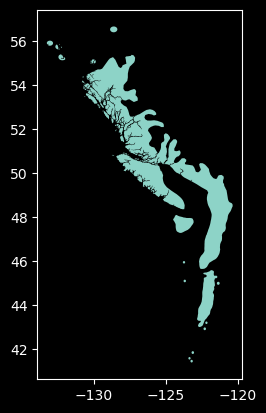

In [4]:
geo.plot()

In [5]:
metadata = pd.read_csv(
    "/media/muskrat/T7 Shield/eco_data/v3/native/little/7445016/wpetry/USTreeAtlas-v1.0/wpetry-USTreeAtlas-4999258/Little_datatable.csv"
)

In [6]:
metadata

,Latin Name,Common Name,Reference,Original Map No(s).,SHP/*
0,Abies amabilis,Pacific silver fir,Little (1971),"1-W, 1-N",abieamab
1,Abies balsamea,balsam fir,Little (1971),"2-N, 2-E",abiebals
2,Abies bracteata,bristlecone fir,Little (1971),3-W,abiebrac
3,Abies concolor,white fir,Little (1971),5-W,abieconc
4,Abies fraseri,Fraser fir,Little (1971),4-E,abiefras
...,...,...,...,...,...
674,Zanthoxylum clava-herculis,Hercules club,Little (1977),165,zantclav
675,Zanthoxylum coriaceum,Biscayne prickly ash,Little (1978),254,zantcori
676,Zanthoxylum fagara,lime prickly ash,"Little (1977, 1978)","164-N, 164-SE, 255",zantfaga
677,Zanthoxylum flavum,West Indies satinwood,Little (1978),256,zantflav


In [7]:
# create new dataframe with latin names, common names, and shp/* columns from metadata

little = metadata[["Latin Name", "Common Name", "SHP/*"]]

In [8]:
little

,Latin Name,Common Name,SHP/*
0,Abies amabilis,Pacific silver fir,abieamab
1,Abies balsamea,balsam fir,abiebals
2,Abies bracteata,bristlecone fir,abiebrac
3,Abies concolor,white fir,abieconc
4,Abies fraseri,Fraser fir,abiefras
...,...,...,...
674,Zanthoxylum clava-herculis,Hercules club,zantclav
675,Zanthoxylum coriaceum,Biscayne prickly ash,zantcori
676,Zanthoxylum fagara,lime prickly ash,zantfaga
677,Zanthoxylum flavum,West Indies satinwood,zantflav
